In [27]:
import boto3

client = boto3.client('rekognition')

In [26]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [51]:
def compare_faces(source_img, target_img, threshold=0.5):
    response = client.compare_faces(
        SourceImage={
            'Bytes' : open(source_img, 'rb').read()
        },
        TargetImage={
            'Bytes' : open(target_img, 'rb').read()
        },
        SimilarityThreshold=threshold,
        QualityFilter='AUTO'
    )
    img=mpimg.imread(source_img)
    imgplot = plt.imshow(img)
    plt.show()
    img=mpimg.imread(target_img)
    imgplot = plt.imshow(img)
    plt.show()
    
    return response

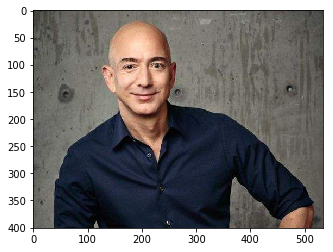

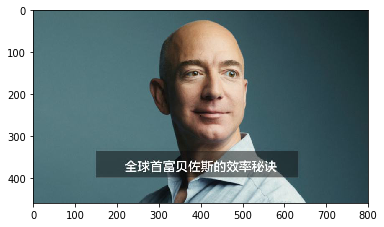

{'SourceImageFace': {'BoundingBox': {'Width': 0.19647051393985748,
   'Height': 0.35956525802612305,
   'Left': 0.28843986988067627,
   'Top': 0.12047099322080612},
  'Confidence': 99.99177551269531},
 'FaceMatches': [{'Similarity': 99.99993133544922,
   'Face': {'BoundingBox': {'Width': 0.22534671425819397,
     'Height': 0.5724993944168091,
     'Left': 0.4056353271007538,
     'Top': 0.09926606714725494},
    'Confidence': 99.99662780761719,
    'Landmarks': [{'Type': 'eyeLeft',
      'X': 0.4798642098903656,
      'Y': 0.3321130871772766},
     {'Type': 'eyeRight', 'X': 0.587348997592926, 'Y': 0.3302777409553528},
     {'Type': 'mouthLeft', 'X': 0.4918994605541229, 'Y': 0.5336726307868958},
     {'Type': 'mouthRight', 'X': 0.5813249349594116, 'Y': 0.5317928194999695},
     {'Type': 'nose', 'X': 0.545076847076416, 'Y': 0.42467522621154785}],
    'Pose': {'Roll': 0.9039541482925415,
     'Yaw': 8.093023300170898,
     'Pitch': 10.402551651000977},
    'Quality': {'Brightness': 80.063

In [52]:
compare_faces('face1.jpeg', 'face2.jpeg')

In [43]:
import numpy as np

In [53]:
def detect_faces(image):
    
    
    img=mpimg.imread(image)
    imgplot = plt.imshow(img)
    plt.show()
    
    response = client.detect_faces(
        Image={
            'Bytes' : open(image, 'rb').read()
        },
        Attributes=[
            'ALL',
        ]
    )
    
    return response

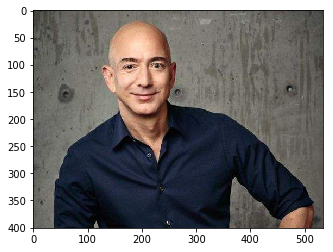

{'FaceDetails': [{'BoundingBox': {'Width': 0.19647051393985748,
    'Height': 0.35956525802612305,
    'Left': 0.28843986988067627,
    'Top': 0.12047099322080612},
   'AgeRange': {'Low': 38, 'High': 56},
   'Smile': {'Value': True, 'Confidence': 96.35932922363281},
   'Eyeglasses': {'Value': False, 'Confidence': 93.94789123535156},
   'Sunglasses': {'Value': False, 'Confidence': 98.98294067382812},
   'Gender': {'Value': 'Male', 'Confidence': 98.82102966308594},
   'Beard': {'Value': False, 'Confidence': 88.01101684570312},
   'Mustache': {'Value': False, 'Confidence': 99.0136947631836},
   'EyesOpen': {'Value': True, 'Confidence': 99.4679183959961},
   'MouthOpen': {'Value': False, 'Confidence': 84.7824478149414},
   'Emotions': [{'Type': 'HAPPY', 'Confidence': 97.23899841308594},
    {'Type': 'SURPRISED', 'Confidence': 0.9979074597358704},
    {'Type': 'CALM', 'Confidence': 0.9340125322341919},
    {'Type': 'CONFUSED', 'Confidence': 0.4718623161315918},
    {'Type': 'DISGUSTED', 'Co

In [54]:
detect_faces('face1.jpeg')

In [55]:
def detect_labels(image, minConfidence=0.8):
    
    img=mpimg.imread(image)
    imgplot = plt.imshow(img)
    plt.show()
    
    response = client.detect_labels(
        Image={
            'Bytes': open(image, 'rb').read()
            
        },
        MaxLabels=123,
        MinConfidence=minConfidence
    )
    
    
    return response

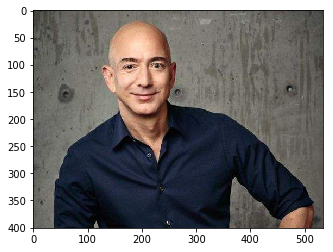

{'Labels': [{'Name': 'Smile',
   'Confidence': 99.86495971679688,
   'Instances': [],
   'Parents': [{'Name': 'Person'}, {'Name': 'Face'}]},
  {'Name': 'Person',
   'Confidence': 99.86495971679688,
   'Instances': [{'BoundingBox': {'Width': 0.9408716559410095,
      'Height': 0.9509536623954773,
      'Left': 0.036274172365665436,
      'Top': 0.030807608738541603},
     'Confidence': 96.1410140991211}],
   'Parents': []},
  {'Name': 'Face',
   'Confidence': 99.86495971679688,
   'Instances': [],
   'Parents': [{'Name': 'Person'}]},
  {'Name': 'Human',
   'Confidence': 99.86495971679688,
   'Instances': [],
   'Parents': []},
  {'Name': 'Apparel',
   'Confidence': 98.62798309326172,
   'Instances': [],
   'Parents': []},
  {'Name': 'Clothing',
   'Confidence': 98.62798309326172,
   'Instances': [],
   'Parents': []},
  {'Name': 'Head',
   'Confidence': 98.10449981689453,
   'Instances': [],
   'Parents': []},
  {'Name': 'Shirt',
   'Confidence': 95.74828338623047,
   'Instances': [],
 

In [56]:
detect_labels('face1.jpeg')

In [60]:
def detect_text(image):
    
    img=mpimg.imread(image)
    imgplot = plt.imshow(img)
    plt.show()
    
    response = client.detect_text(
        Image={
            'Bytes': open(image, 'rb').read()
            
        },
        Filters={
            'WordFilter': {
                'MinConfidence': 0.6,
            }
        }
    )
    
    
    return response

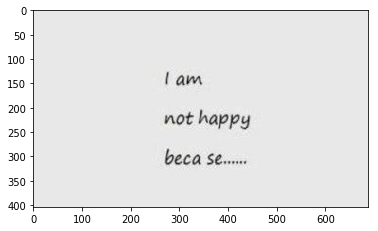

{'TextDetections': [{'DetectedText': '1 am',
   'Type': 'LINE',
   'Id': 0,
   'Confidence': 82.72087097167969,
   'Geometry': {'BoundingBox': {'Width': 0.11841816455125809,
     'Height': 0.07326444238424301,
     'Left': 0.3910474181175232,
     'Top': 0.3027302026748657},
    'Polygon': [{'X': 0.3910474181175232, 'Y': 0.3027302026748657},
     {'X': 0.5094655752182007, 'Y': 0.31448325514793396},
     {'X': 0.5069582462310791, 'Y': 0.38774770498275757},
     {'X': 0.3885400891304016, 'Y': 0.37599462270736694}]}},
  {'DetectedText': 'not happy',
   'Type': 'LINE',
   'Id': 1,
   'Confidence': 99.97452545166016,
   'Geometry': {'BoundingBox': {'Width': 0.2611498534679413,
     'Height': 0.11137523502111435,
     'Left': 0.3882479667663574,
     'Top': 0.48943132162094116},
    'Polygon': [{'X': 0.3882479667663574, 'Y': 0.48943132162094116},
     {'X': 0.6493978500366211, 'Y': 0.4975602924823761},
     {'X': 0.6482024192810059, 'Y': 0.608935534954071},
     {'X': 0.3870525360107422, 'Y'

In [63]:
detect_text('text.jpeg')